# About DataSet
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


# COLUMN DESCRIPTION FOR DIABETES DATA:
• Pregnancies <br>
• Glucose <br>
• Blood Pressure<br>
• Skin Thickness <br>
• Insulin <br>
• BMI <br>
• Diabetes <br>
• Age <br>
• Outcome <br>

From the data set in the (.csv) File We can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).

In [5]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#IMPORTING IMPORTANT LIBRARIES FOR PREDICTION
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [7]:
#loadind the database
data = pd.read_csv(r"C:\Users\preet\Desktop\OlineCourses\MeriSkill_Virtual_Internship\Project-2\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


<Axes: >

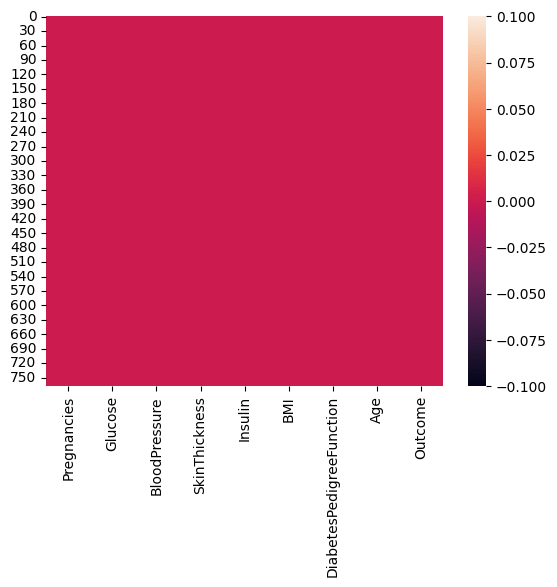

In [11]:
#Checking for missing values
sns.heatmap(data.isnull())

# Data Visualization

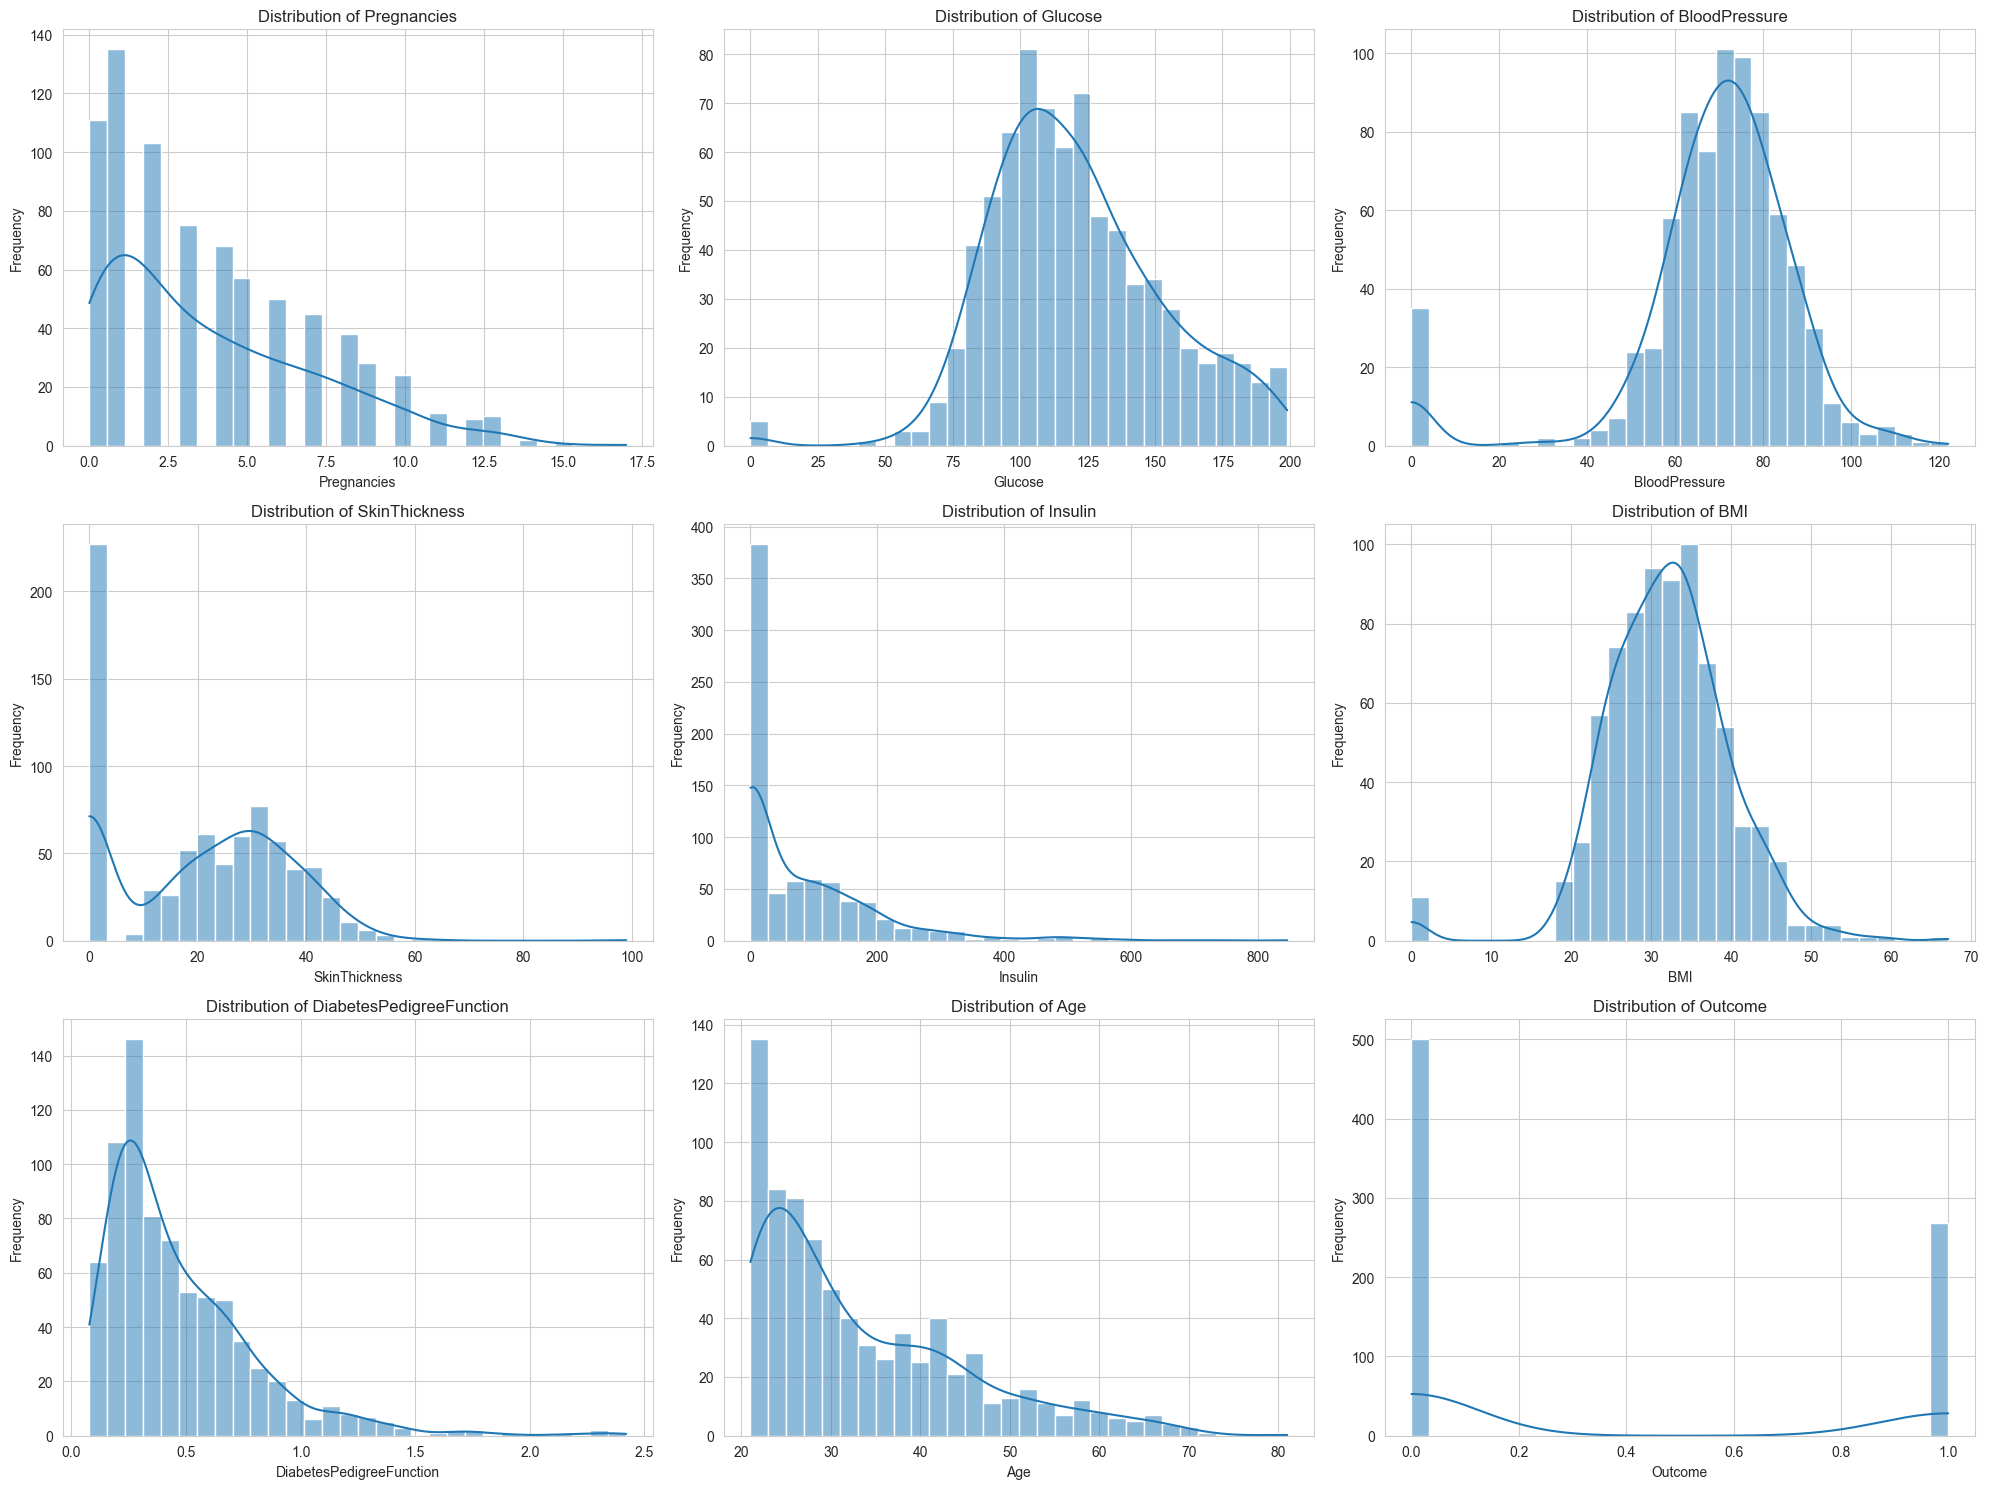

In [21]:
sns.set_style("whitegrid")


# Calculate the number of rows needed for subplots
num_columns = len(data.columns)
num_rows = int(np.ceil(num_columns / 3))  

plt.figure(figsize=(20, 15))

for i, column in enumerate(data.columns, 1):
    plt.subplot(num_rows, 3, i)  
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## The histograms offer a glimpse into the distribution of each variable:

- **Pregnancies**: The majority of women in the dataset have experienced 0-2 pregnancies, and fewer women have a higher number of pregnancies.
- **Glucose**: The distribution appears fairly normal, but there is a small peak around the lower values.
- **BloodPressure**: The distribution is somewhat normal, centered around 70.
- **SkinThickness**: A noticeable peak is observed around the lower values.
- **Insulin**: The majority of values are on the lower side, with a few higher values.
- **BMI**: The distribution is slightly right-skewed, with a peak around 30.
- **DiabetesPedigreeFunction**: Most values are on the lower side, indicating that many individuals in the dataset have a lower likelihood based on their ancestry.
- **Age**: The majority of individuals are in their 20s and 30s.
- **Outcome**: More individuals do not have diabetes (0) than those who do (1).

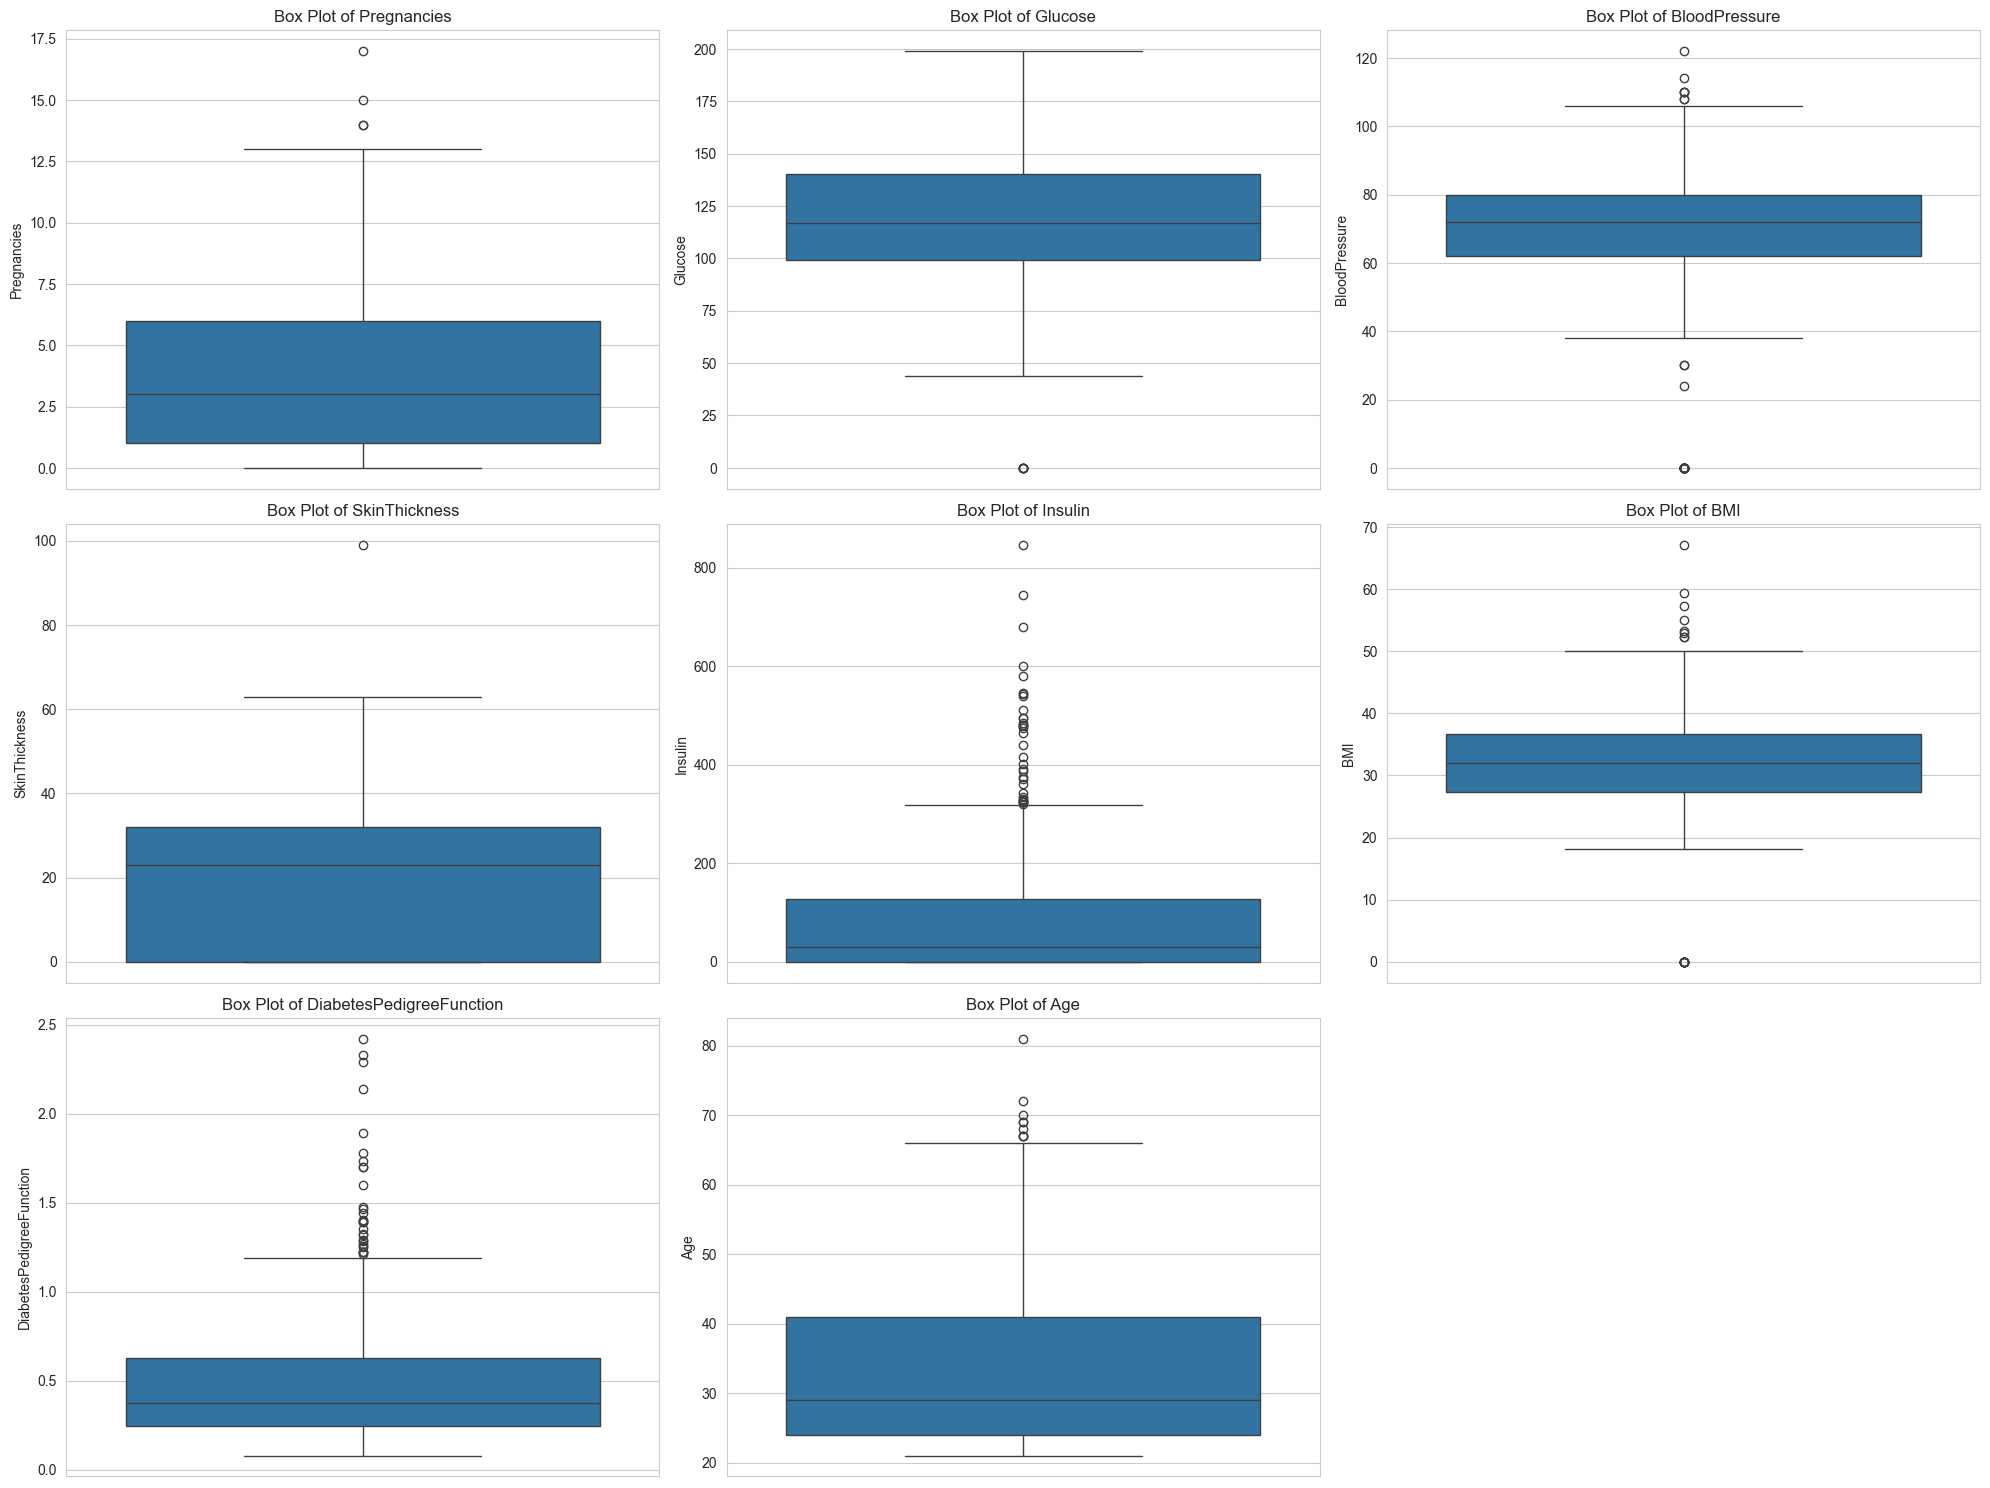

In [22]:
sns.set_style("whitegrid")


# Initialize the figure for box plots
plt.figure(figsize=(20, 15))

# Plot box plots for each variable (excluding Outcome)
for i, column in enumerate(data.columns[:-1], 1):  # Exclude 'Outcome' for box plots
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

## Interpretations of Box Plots:

- **Pregnancies**: The box plot suggests a median around 2 pregnancies, with outliers indicating that some women have experienced a significantly higher number of pregnancies.

- **Glucose**: Central values are tightly packed, and outliers are present, suggesting a few individuals with notably different glucose levels.

- **BloodPressure**: Most individuals exhibit blood pressure within a normal range, with some outliers on the higher end.

- **SkinThickness**: There's considerable variation in skin thickness, and several outliers indicate particularly high measurements.

- **Insulin**: The data for insulin levels displays significant variability, with numerous high outliers, pointing to a diverse range of insulin levels in the population.

- **BMI**: BMI values are predominantly around the median, showing a normal distribution with some high-value outliers.

- **DiabetesPedigreeFunction**: This metric exhibits a right-skewed distribution, and there are several outliers indicating higher hereditary risk factors for diabetes.

- **Age**: The majority of the population is concentrated in younger age brackets, with a skew towards older ages among outliers.

In [12]:
#CO RELATION MATRIX
correlation=data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

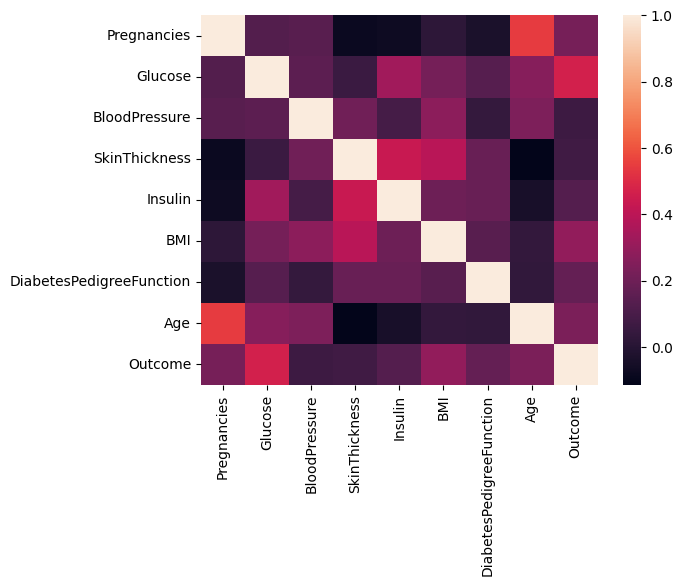

In [20]:
sns.heatmap(data.corr())


## Interpretations of the Correlation Matrix:

- **Pregnancies**: Shows a noticeable positive correlation with Age, suggesting that as women get older, the number of pregnancies tends to be higher.

- **Glucose**: Demonstrates a strong positive correlation with Outcome, indicating that higher glucose levels may be associated with diabetes.

- **BloodPressure**: Displays low to moderate correlations with other variables, not indicating a strong relationship with the diabetes Outcome.

- **SkinThickness**: Exhibits some positive correlation with BMI, as expected due to their shared connection to body composition.

- **Insulin**: Does not exhibit a strong correlation with most variables but shows a slight positive relationship with SkinThickness and BMI.

- **BMI**: Displays a moderate positive correlation with SkinThickness and DiabetesPedigreeFunction, suggesting a link between body mass, skin fold thickness, and genetic predisposition to diabetes.

- **DiabetesPedigreeFunction**: Exhibits some positive correlation with Age and BMI but does not strongly indicate diabetes Outcome in this visualization.

- **Age**: Positively correlated with Pregnancies, indicating that older women in the dataset have been pregnant more often.

- **Outcome**: Strongly correlated with Glucose levels and, to a lesser extent, with BMI and Age, aligning with known risk factors for diabetes.

# TRAINING THE MODEL WITH THE HELP OF TRAIN TEST SPLIT
## Train test split

In [24]:
X=data.drop("Outcome",axis=1)
Y=data['Outcome']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In X all the independent variables are stored <br>
In Y the predictor variable(“OUTCOME”) is stored. <br>
Train-test split is a technique used in machine learning to assess model performance. It divides the dataset into a training set and a testing set, with a 0.2 test size indicating that 20% of the data is used for testing and 80% for training.

# Training the model


In [27]:
model=LogisticRegression()
model.fit(X_train,Y_train)

c:\Users\preet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Fitting the X train and y train data into the variable called model.

# Making Prediction


In [32]:
prediction=model.predict(X_test)

In [33]:
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0]


After training the model, predictions are made using the test data, which comprises 20% of the total dataset.

In [34]:
accuracy=accuracy_score(prediction,Y_test)

In [35]:
print(accuracy)

0.7532467532467533


The accuracy of the model is then calculated and determined.